## Kolokwium - Python

Mateusz Lamla

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ZADANIE 1

In [100]:
df = pd.read_csv("temperatura.csv")
df = df.to_numpy()

mean = np.mean(df)
median = np.median(df)
var = np.var(df)
std_dev = np.std(df)

print("Mean:", mean)
print("Median:", median)
print("Variance:", var)
print("Standard Deviation:", std_dev)

Mean: 20.056728394512927
Median: 19.93720185465161
Variance: 5.663570667586493
Standard Deviation: 2.3798257641236034


In [101]:
more_than_22 = np.sum(df > 22)
print(f"Number of samples temperature was bigger than 22 degrees: {more_than_22}")

Number of samples temperature was bigger than 22 degrees: 56


In [64]:
df_normalized = (df - mean) / std_dev

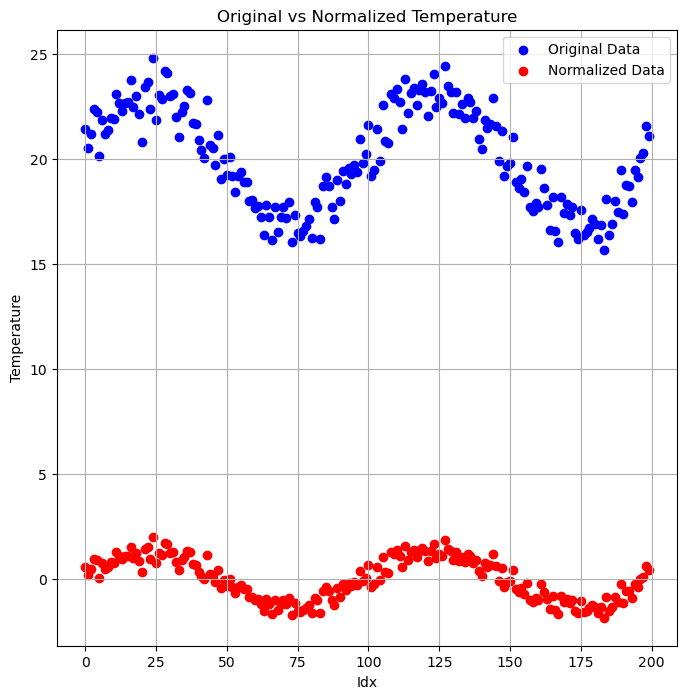

In [65]:
plt.figure(figsize = (8,8))
plt.scatter(range(len(df)), df, color='blue', label='Original Data')
plt.scatter(range(len(df_normalized)), df_normalized, color='red', label='Normalized Data')
plt.xlabel('Idx')
plt.ylabel('Temperature')
plt.title('Original vs Normalized Temperature')
plt.legend()
plt.grid(True)
plt.show()

ZADANIE 2

In [66]:
df = pd.read_csv('sprzedaz.csv')
df['Wartosc'] = df['Cena'] * df['Ilość']
df

,Produkt,Kategoria,Cena,Ilość,Miasto,Wartosc
0,Laptop,Elektronika,3500,3,Warszawa,10500
1,Mysz,Elektronika,80,15,Kraków,1200
2,Klawiatura,Elektronika,120,12,Warszawa,1440
3,Fotel,Gaming,900,4,Gdańsk,3600
4,Monitor,Elektronika,1200,5,Katowice,6000
5,Biurko,Meble,700,2,Wrocław,1400
6,Słuchawki,Elektronika,200,20,Kraków,4000
7,Router,Elektronika,300,7,Warszawa,2100
8,Mikrofon,Audio,450,6,Gdańsk,2700
9,Podkładka,Gaming,50,30,Wrocław,1500


In [67]:
top3_unit_price = df.nlargest(3, 'Cena')
top3_total_value = df.nlargest(3, 'Wartosc')

print(f"Top 3 products by unit price\n: {top3_unit_price}")
print()
print(f"Top 3 products by total value\n: {top3_total_value}")

Top 3 products by unit price
:    Produkt    Kategoria  Cena  Ilość    Miasto  Wartosc
0   Laptop  Elektronika  3500      3  Warszawa    10500
4  Monitor  Elektronika  1200      5  Katowice     6000
3    Fotel       Gaming   900      4    Gdańsk     3600

Top 3 products by total value
:      Produkt    Kategoria  Cena  Ilość    Miasto  Wartosc
0     Laptop  Elektronika  3500      3  Warszawa    10500
4    Monitor  Elektronika  1200      5  Katowice     6000
6  Słuchawki  Elektronika   200     20    Kraków     4000


In [68]:
df_grouped = df.groupby(['Kategoria'])
df_grouped = df_grouped.agg({'Ilość': 'sum', 'Wartosc': 'mean'})
print(df_grouped)

             Ilość      Wartosc
Kategoria                      
Audio            6  2700.000000
Elektronika     62  4206.666667
Gaming          34  2550.000000
Meble            2  1400.000000


In [69]:
table = pd.pivot_table(df, values='Wartosc', index='Miasto', columns='Kategoria', aggfunc='sum', fill_value=0)
print(table)

Kategoria  Audio  Elektronika  Gaming  Meble
Miasto                                      
Gdańsk      2700            0    3600      0
Katowice       0         6000       0      0
Kraków         0         5200       0      0
Warszawa       0        14040       0      0
Wrocław        0            0    1500   1400


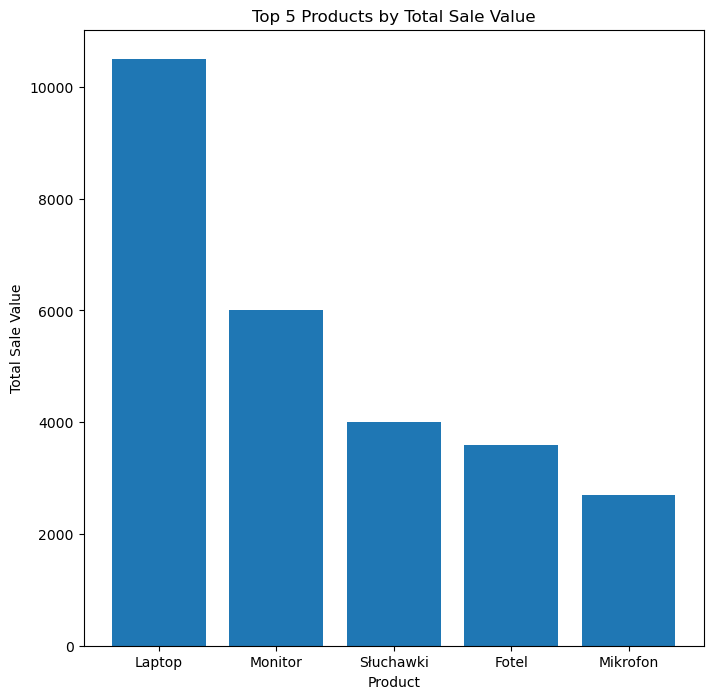

In [70]:
top5_biggest_sales = df.nlargest(5, 'Wartosc')
plt.figure(figsize = (8,8))
plt.bar(top5_biggest_sales['Produkt'], top5_biggest_sales['Wartosc'])
plt.xlabel('Product')
plt.ylabel('Total Sale Value')
plt.title('Top 5 Products by Total Sale Value')
plt.show()

ZADANIE 3

In [107]:
n = 20000
x_rand = np.random.uniform(-1, 1, n)
y_rand = np.random.uniform(-1, 1, n)

inside_x = x_rand[x_rand**2 + y_rand**2 <= 1]
inside_y = y_rand[x_rand**2 + y_rand**2 <= 1]

outside_x = x_rand[x_rand**2 + y_rand**2 > 1]
outside_y = y_rand[x_rand**2 + y_rand**2 > 1]

approximate_pi = 4 * len(inside_x) / n
print("Approximation of PI:", approximate_pi)

Approximation of PI: 3.142


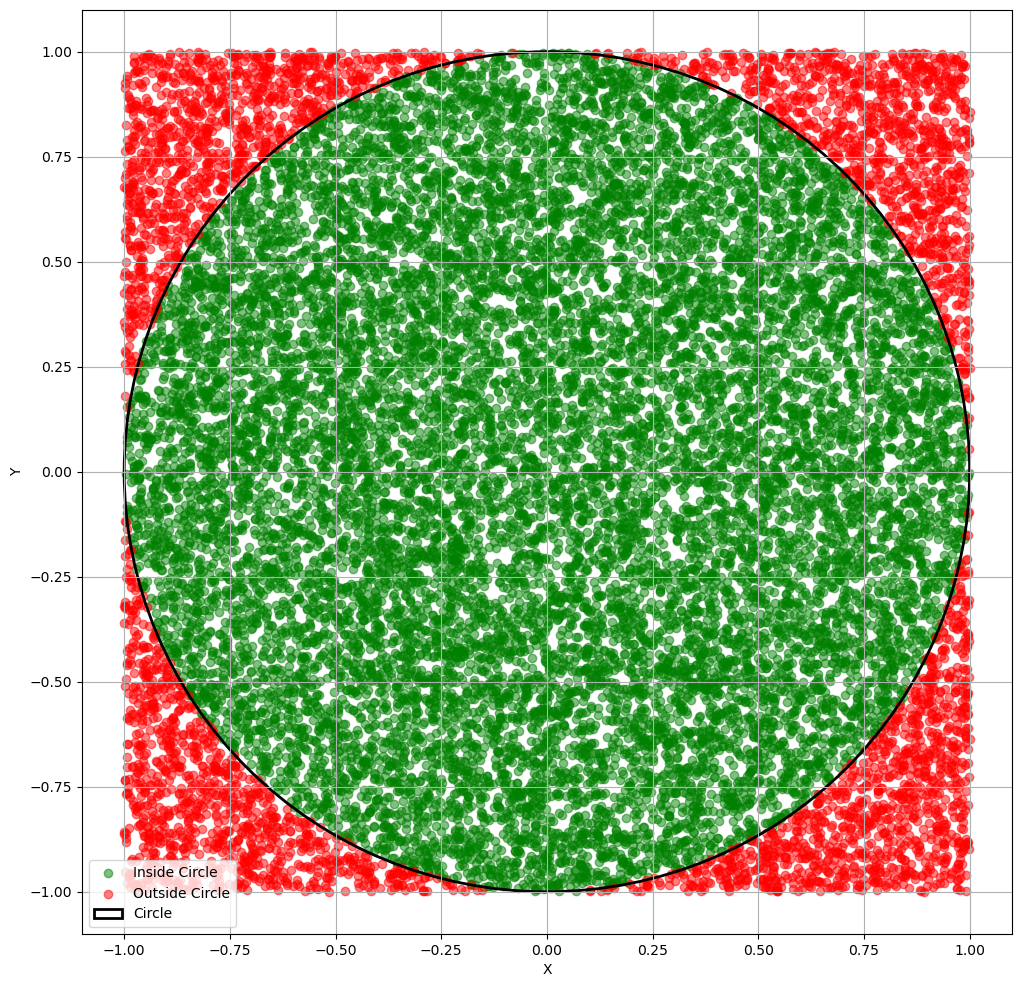

In [110]:
fig, ax = plt.subplots(figsize=(12,12))

ax.scatter(inside_x, inside_y, color='green', alpha = 0.5, label='Inside Circle')
ax.scatter(outside_x, outside_y, color='red', alpha = 0.5, label='Outside Circle')
ax.add_patch(plt.Circle((0, 0), 1, color='black', linewidth=2, fill=False, label = 'Circle'))
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

In [109]:
difference = np.abs(np.pi - approximate_pi)
print(difference)

0.0004073464102067881
